In [8]:
import cv2
print("OPENCV VERSION:",cv2.__version__)
import matplotlib.pyplot as plt
import numpy as np

OPENCV VERSION: 4.11.0


In [9]:
image = cv2.imread(r"C:\Users\ishaan.narayan\Pictures\Screenshots\Screenshot 2025-06-26 111456.png")

In [10]:
if image is None:
    print("Error: Image not found or the path is incorrect.")
else:
    gray        = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    #otsu thresholding is done to set a threshold so that , the Objects Can be differentiated with the background and easily Separated.
    
#----------------------------------------------------------------------------------------------------

    #now Morphological Opening 
    kernel  = np.ones((3,3),np.uint8) #Creates a matrix of 3x3 of ones , that will be used as the kernel for morphological operation of Opening 
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations=2) #there will be 2 iterations 
    #The opening var will be will be a cleaner binary image with less noise 
    
#-----------------------------------------------------------------------------------------------------
    
    #Dilating so that , backgraound Can be fetched.
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
#-----------------------------------------------------------------------------------------------------

    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg   = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    sure_fg        = np.uint8(sure_fg)
    
     #**
     
#-----------------------------------------------------------------------------------------------------

    unknown = cv2.subtract(sure_bg, sure_fg)  
    
#-----------------------------------------------------------------------------------------------------

    ret, markers = cv2.connectedComponents(sure_fg) #FINDS THE OBJECTS AND PROVIDE THE NUMBER 
    markers = markers + 1 #
    markers[unknown == 255] = 0 #UNKNOWN REGIONS ARE SET TO 0 , TO FIGURE THEM OUT 

#-----------------------------------------------------------------------------------------------------

    img_marked = image.copy()
    markers = cv2.watershed(img_marked, markers)
    img_marked[markers == -1] = [255, 0, 0]  # Red color for boundaries     
        
        
        
    

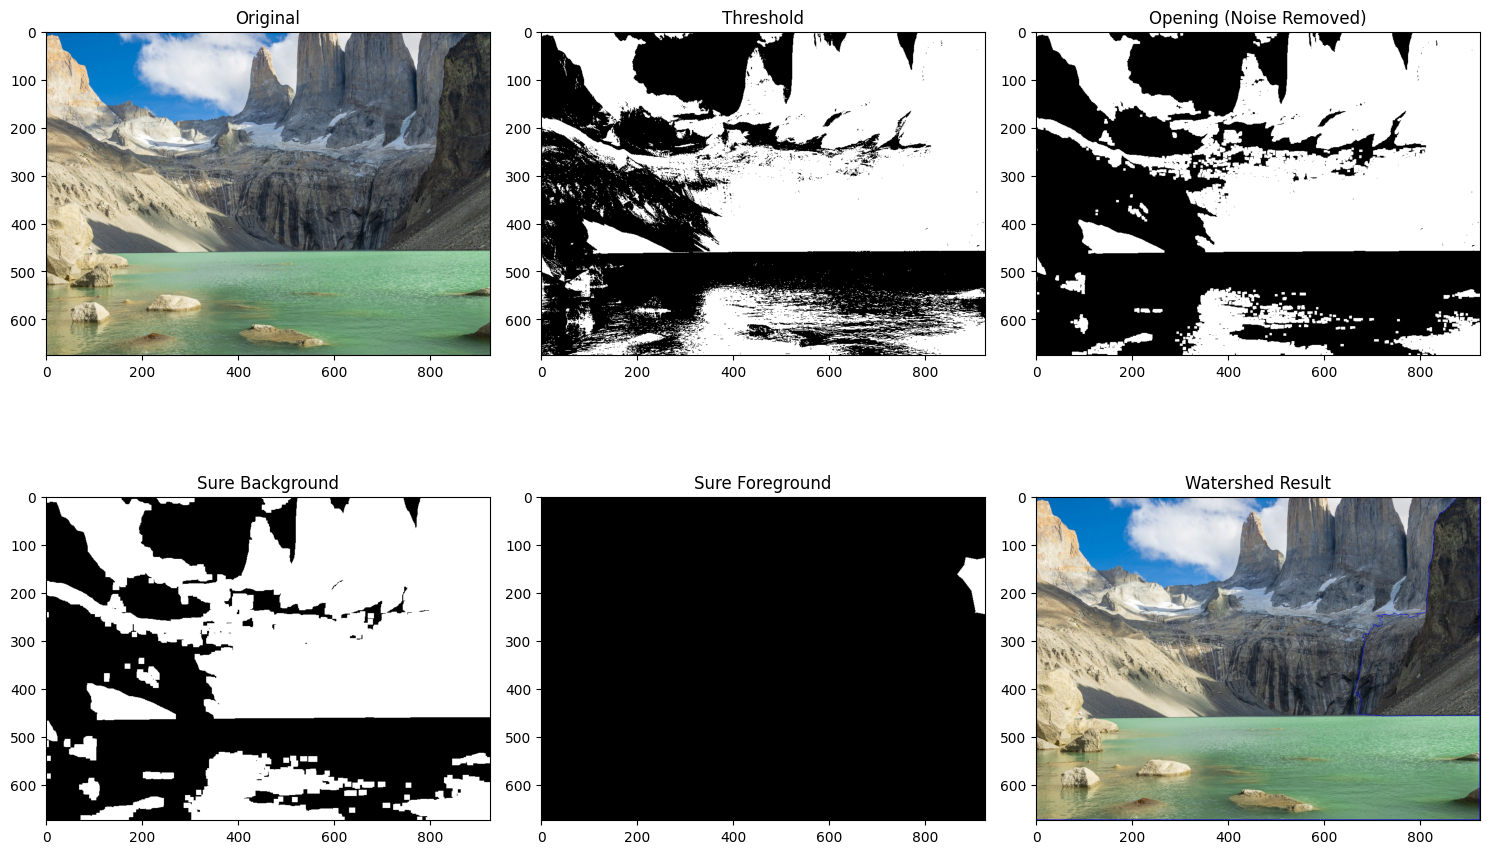

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(2,3,2), plt.imshow(thresh, cmap='gray'), plt.title('Threshold')
plt.subplot(2,3,3), plt.imshow(opening, cmap='gray'), plt.title('Opening (Noise Removed)')
plt.subplot(2,3,4), plt.imshow(sure_bg, cmap='gray'), plt.title('Sure Background')
plt.subplot(2,3,5), plt.imshow(sure_fg, cmap='gray'), plt.title('Sure Foreground')
plt.subplot(2,3,6), plt.imshow(cv2.cvtColor(img_marked, cv2.COLOR_BGR2RGB)), plt.title('Watershed Result')
plt.tight_layout()
plt.show()

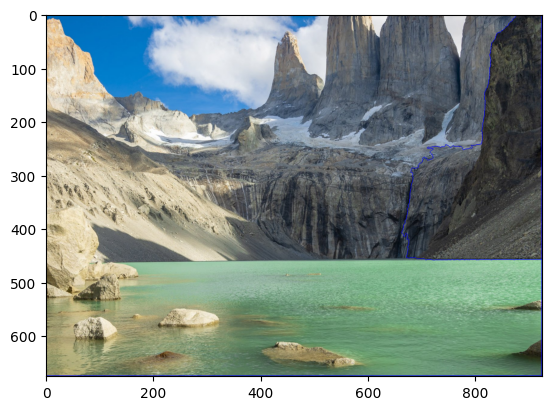

In [16]:
plt.imshow(cv2.cvtColor(img_marked, cv2.COLOR_BGR2RGB))
plt.show()
